In [14]:
import json
import pandas as pd
import plotly.express as px

In [16]:
with open("remote_software_engineer_us_canada.json", "r") as f:
    swe = json.load(f)
    
with open("remote_data_science_us_canada.json", "r") as f:
    ds = json.load(f)

In [31]:
swe = pd.DataFrame(swe)
swe["date"] = pd.to_datetime(swe["date"])
swe["year"] = swe["date"].apply(lambda x: x.year)
swe = swe.sort_values("years_of_experience")
swe = swe[(swe.years_of_experience >= 4) & (swe.years_of_experience <= 5)]

In [32]:
ds = pd.DataFrame(ds)
ds["date"] = pd.to_datetime(ds["date"])
ds["year"] = ds["date"].apply(lambda x: x.year)
ds = ds.sort_values("years_of_experience")
ds = ds[(ds.years_of_experience >= 4) & (ds.years_of_experience <= 5)]


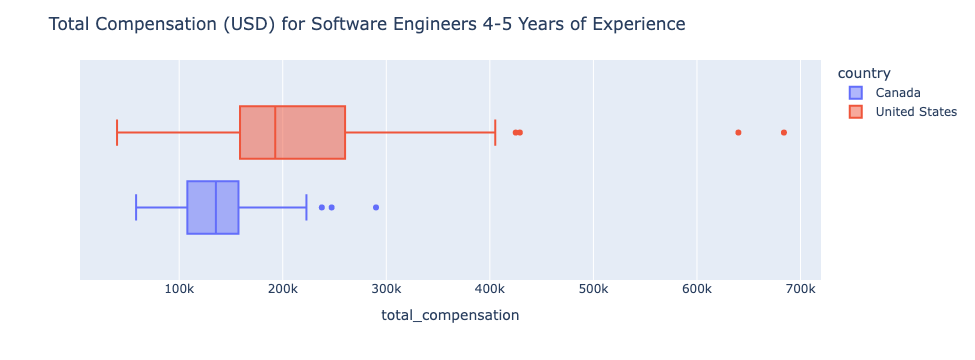

Median Total Compensation (USD)


,country,total_compensation,total_compensation_cad
0,Canada,135451,170668.26
1,United States,192750,242865.00


In [33]:
fig = px.box(swe.sort_values('country'), x="total_compensation", color="country")
fig.update_layout(
    title_text='Total Compensation (USD) for Software Engineers 4-5 Years of Experience '
)

fig.show()
print("Median Total Compensation (USD)")
tc = swe.groupby("country")['total_compensation'].median().reset_index()
tc["total_compensation_cad"] = tc['total_compensation']*1.26
tc

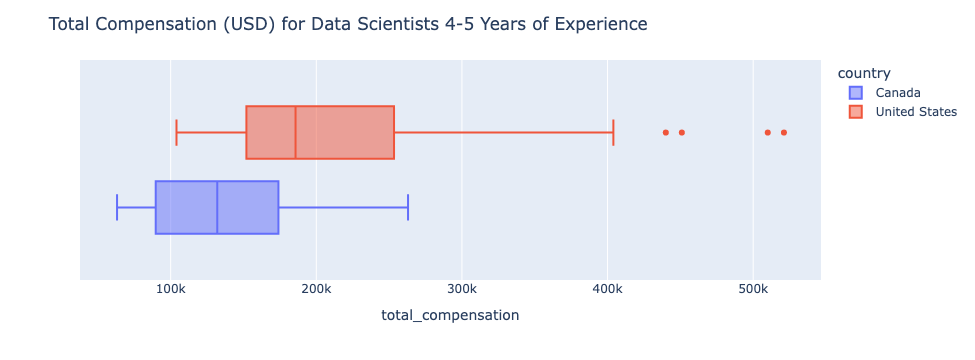

Median Total Compensation (USD)


,country,total_compensation,total_compensation_cad
0,Canada,131992.5,166310.55
1,United States,185750.0,234045.00


In [35]:
fig = px.box(ds.sort_values('country'), x="total_compensation", color="country")
fig.update_layout(
    title_text='Total Compensation (USD) for Data Scientists 4-5 Years of Experience '
)

fig.show()
print("Median Total Compensation (USD)")
tc = ds.groupby("country")['total_compensation'].median().reset_index()
tc["total_compensation_cad"] = tc['total_compensation']*1.26
tc